In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
train_dir = "dataset_new/train"
test_dir = "dataset_new/test"

In [3]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, color_mode="grayscale"
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, color_mode="grayscale"
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 67705 files belonging to 4 classes.
Found 43498 files belonging to 4 classes.
Classes: ['Closed', 'Open', 'no_yawn', 'yawn']


In [4]:
normalization_layer = layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(AUTOTUNE)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\srive\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,140 (2.61 MB)

 Trainable params: 683,140 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(train_ds, validation_data=test_ds, epochs=15)

Epoch 1/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 620s 293ms/step - accuracy: 0.9537 - loss: 0.1106 - val_accuracy: 0.9965 - val_loss: 0.0089
Epoch 2/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 259s 123ms/step - accuracy: 0.9890 - loss: 0.0253 - val_accuracy: 0.9978 - val_loss: 0.0048
Epoch 3/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 234s 110ms/step - accuracy: 0.9912 - loss: 0.0197 - val_accuracy: 0.9975 - val_loss: 0.0065
Epoch 4/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 204s 96ms/step - accuracy: 0.9928 - loss: 0.0168 - val_accuracy: 0.9979 - val_loss: 0.0048
Epoch 5/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 187s 89ms/step - accuracy: 0.9939 - loss: 0.0147 - val_accuracy: 0.9989 - val_loss: 0.0033
Epoch 6/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 217s 102ms/step - accuracy: 0.9954 - loss: 0.0115 - val_accuracy: 0.9988 - val_loss: 0.0034
Epoch 7/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 223s 105ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accuracy: 0.9989 - val_loss: 0.0029
Epoch 8/15
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 234s 111ms/step - accu

In [9]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

   1/1360 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - accuracy: 1.0000 - loss: 8.9407e-08

1360/1360 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.9992 - loss: 0.0039
Test Accuracy: 99.92%


In [7]:
model.save("drowsiness_cnn.h5")
print("✅ Model saved as drowsiness_cnn.h5")

✅ Model saved as drowsiness_cnn.h5


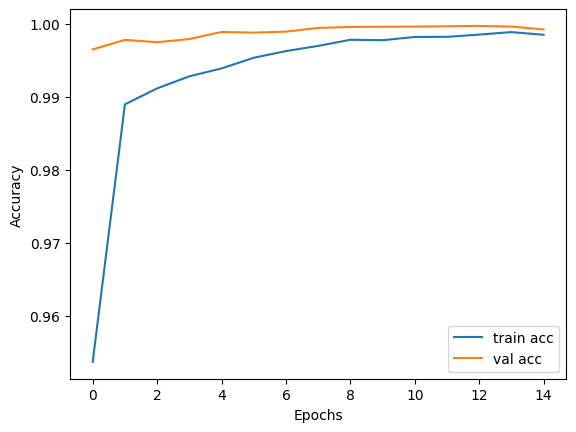

In [8]:
plt.plot(history.history['accuracy'], label="train acc")
plt.plot(history.history['val_accuracy'], label="val acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
